ЛАБОРАТОРНАЯ РАБОТА 2. ВИЗУАЛИЗАЦИЯ ДАННЫХ

Цели и задачи

Цель лабораторной работы: изучение программных средств для визуализации наборов данных.
Основные задачи:
–	установка и настройка matplotlib, seaborn;
–изучение основных типов графиков библиотеки matplotlib;
–изучение основных типов графиков библиотеки seaborn;
–	получение навыков анализа данных по визуальным представлениям данных.

Оборудование и материалы

Для выполнения лабораторной работы рекомендуется использовать персональный компьютер со следующими программными средствами разработки (выбрать один или несколько програмных продуктов для практической реализации задач лабораторной работы): MS Visual Studio 2015 и выше; среда разработки Java, интерпретатор Python (Jupyter Notebook) с библиотеками matplotlib, seaborn, numpy.

Методика и порядок выполнения работы

Перед выполнением индивидуального задания рекомендуется выполнить все пункты учебной задачи.

Постановка задачи.
Выполним анализ набора данных «Предсказание ухода клиента». Данный набор данных используется в качестве учебного набора при изучении методов прогнозирования. Набор представляет собой данные об активности клиентаов телекоммуникационной компании (количество часов разговоров, видеозвонков, ночные и дневные разговоры и прочие). Набор данных подходит для обучения моделей логистической регрессии, моделей классификации (CNN, kNN, Logic tree). Набор данных можно получить в репозитории [5] или на портале Kaggle [4].
Рассмотрим основные признаки, представленный в наборе. Загрузим набор данных с использованием pandas и выведем признаки набора данных (рисунок 10).









In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
data_path = "/content/Churn_Modelling.csv"
data = pd.read_csv(data_path)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Набор данных telecom_churn.csv содержит большое количество признаков. Для детального изучения воспользуемся методом info() класса DataFrame

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Графики, используемые при анализе данных, делят не по библиотекам, с использованием которых они строятся, а по типам признаков, для анализа которых предназначены графики.

Визуализация количественных признаков
Для представления распределения простого коичественного признака подходит обычная гистограмма, содержащаяся во всех библиотеках


<Axes: >

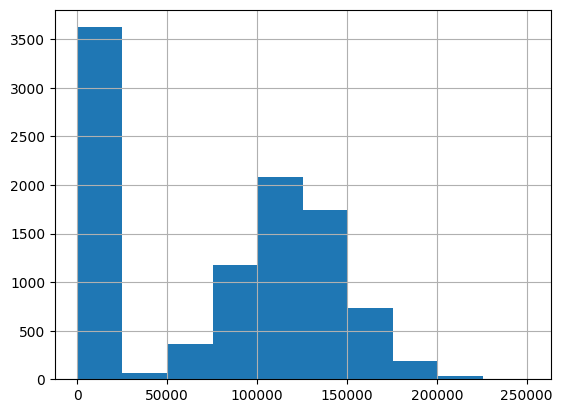

In [53]:
data['Balance'].hist()

Для построения гистограммы вызывается метод hist() класса DataFtrame. На соамом деле используется метод из библиотеки matplotlib. Метод hist() можно использовать для построения гистограмм по нескольким признакам (рисунок 13). При этом неколичественные признаки игнорируются.

Аналогичный тип графика можно получить с использованием matplotlib (рисунок 14). Если необходимо построить график распределения, аналогичный представленному на рисунке 12, то нужно выполнить дополнительные расчеты (рисунок 15).

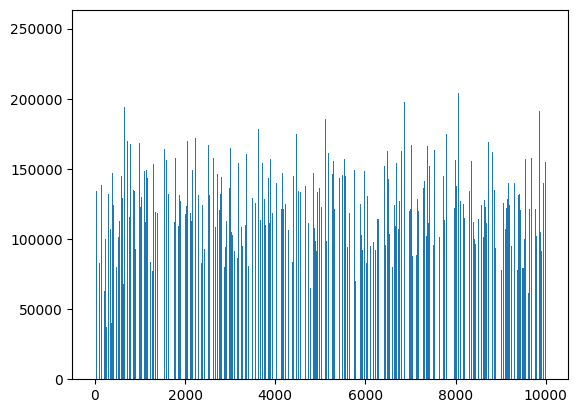

In [54]:
plt.bar(data.index, data['Balance'])
plt.show()

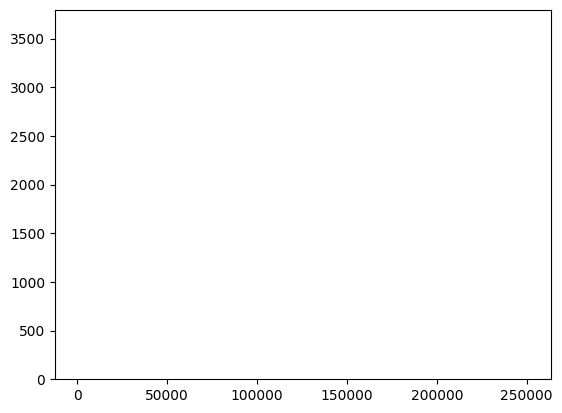

In [56]:
hist = data['Balance'].value_counts()
plt.bar(hist.index, hist);

Один из эффективных типов графиков для анализа количественных признаков – это «ящик с усами» (boxplot). На рисунке 16 показан код и реализованный график. Для анализа нескольких признаков графики boxplot также эффективны. На рисунке 17 представлен код и результат построения графиков для анализа пяти штатов с максимальным объемом дневных звонков.

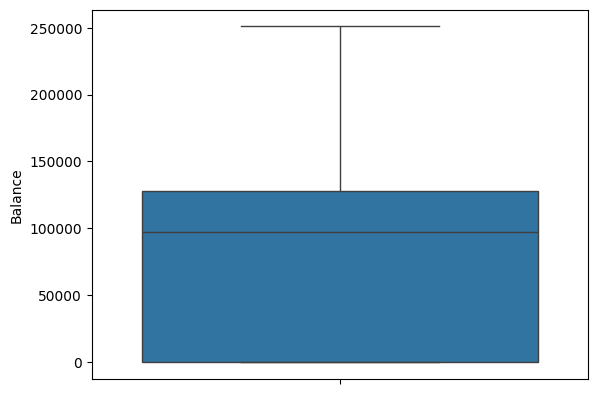

In [57]:
sns. boxplot(data['Balance']);

<ipython-input-58-97da657c952a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Geography',


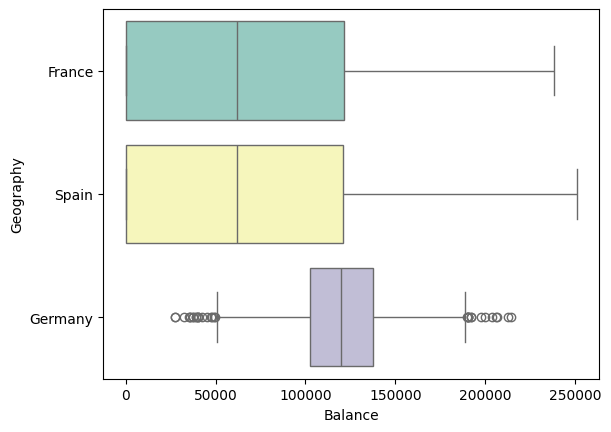

In [58]:
top_data = data[['Geography','Balance']]
top_data = top_data.groupby('Geography').sum()
top_data = top_data.sort_values('Balance',ascending=False)
top_data = top_data[:5].index.values
sns.boxplot(y='Geography',
            x='Balance',
            data=data[data.Geography.isin(top_data)], palette='Set3');


График boxplot состоит из коробки, усов и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% ( первая квартиль, 𝑄1) и 75% (𝑄3) перцентили. Черта внутри коробки обозначает медиану распределения (можно получить с использованием метода median() в pandas и numpy). Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток
(𝑄1 − 1,5 ∙ 𝐼𝑄𝑅, 𝑄3 + 1,5 ∙ 𝐼𝑄𝑅), где 𝐼𝑄𝑅 = 𝑄3 − 𝑄1 – интерквартильный размах. Точками на графике обозначаются выбросы (outliers), то есть те значения, которые не вписываются в промежуток значений, заданный усами графика (рисунок 18).
  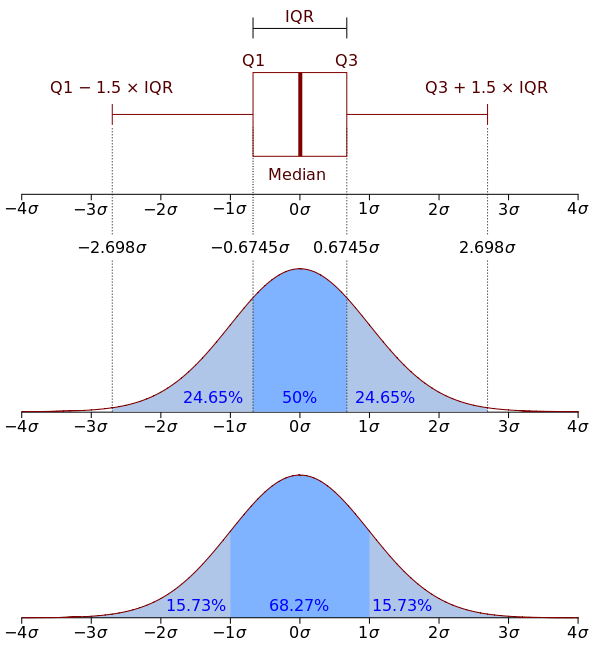
Рисунок 18 – Структура графика типа «ящик с усами»


Категориальные признаки
Типичным категориальным признаком в анализируемом наборе данных является «Штат» (State). Под категориальный признак подходит также «Отказ» (Churn) (хотя он является логическим). На рисунке 19 представлены графики типа countplot() из библиотеки seaborn, которые строят гистограммы, но не по сырым данным, а по расчитанному количеству разных значений признака.


<Axes: xlabel='count', ylabel='Geography'>

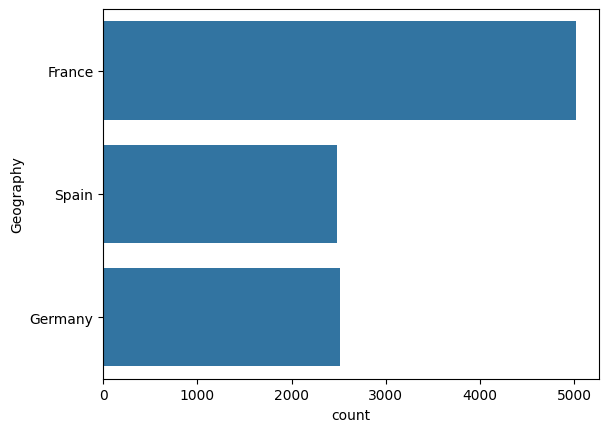

In [60]:
sns.countplot(data['Geography'])

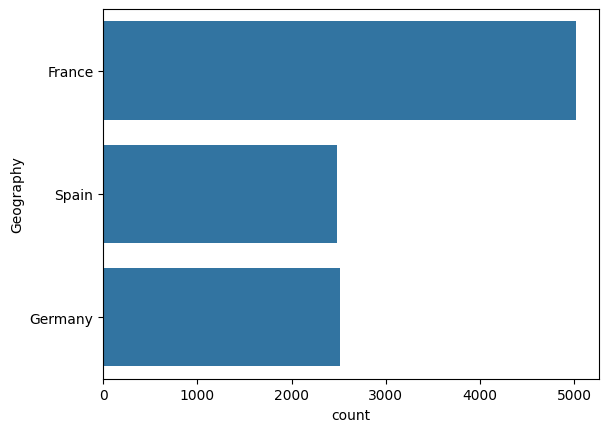

In [62]:
sns.countplot(data[data['Geography'].isin(data['Geography'].\
value_counts().head(5).index)]['Geography']);

Одним из вариантов визуализации соотношения количественных признаков является диаграмма по нескольким признакам (рисунки 15, 19). Рассмотрим пример демонстрирующий сравнениераспределений показателей, связанных с финансовыми затратами клиентов. Упрощенно, можно сказать, что это все показатели, содержащие подстроку «charge» в имени показателя.

In [68]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'Credit' in f]
feats

['CreditScore']

После отбора интересующих показателей можно построить диаграммы для сравнения

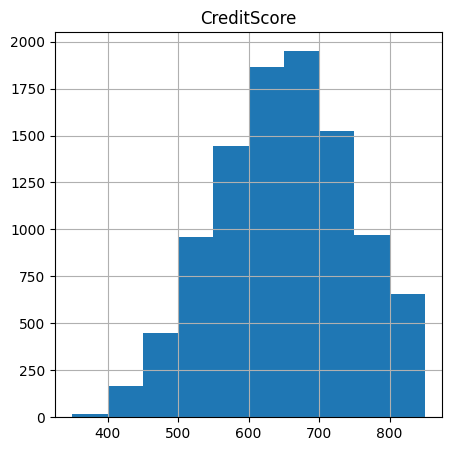

In [69]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

Часто используют попарное сравнение признаков для обеспечения широкого взгляда на набор данных (рисунок 22). На диаганальных графиках рисунка 22 представлены гистограммы распределения отдельного признака, на внедиаганальных позициях – попарные распределения.

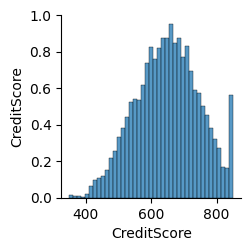

In [70]:
# Попарное распределение признаков
# # Применение Seabourn
sns.pairplot(data[feats]);

Можно реализовать более сложные графики. Например, если требуется добавить к существующим признакам, целевой признак Churn (количество отказов) и раскрасить разные типы элементов, то можно воспользоваться попарными распределениями, но с отображением подмножеств отказов (рисунок 23).
До сих пор использовались возможности библиотеки seaborn, а также методы pandas (которые производят визуализацию, оращаясь к библиотеке matplotlib). Библиотека matplotlib наиболее известная и широко применяемая при анализе данных в рамках стека технологий python.
[Текст ссылки](https://)

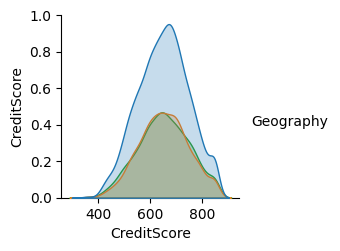

In [80]:
sns.pairplot(data[feats + ['Geography']], hue='Geography');

На рисунке 24 показан пример использования графика scatter библиотеки matplotlib, предназначенного для вывода множества точек.

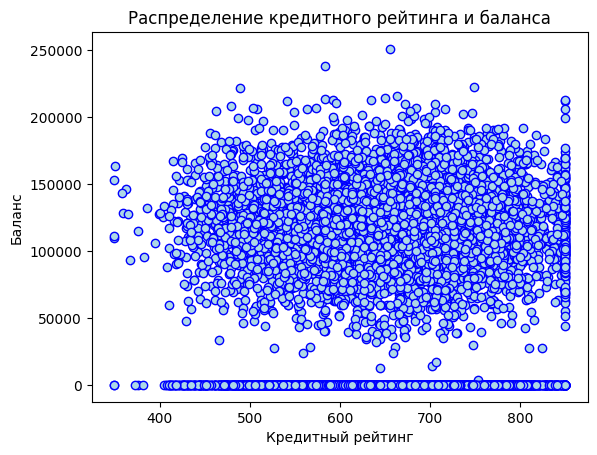

In [75]:
plt.scatter(data['CreditScore'],
            data['Balance'],
            color='lightblue', edgecolor='blue')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Баланс')
plt.title('Распределение кредитного рейтинга и баланса');
plt.show()

На рисунке 25 показан пример более тонкой настройки параметров графика.

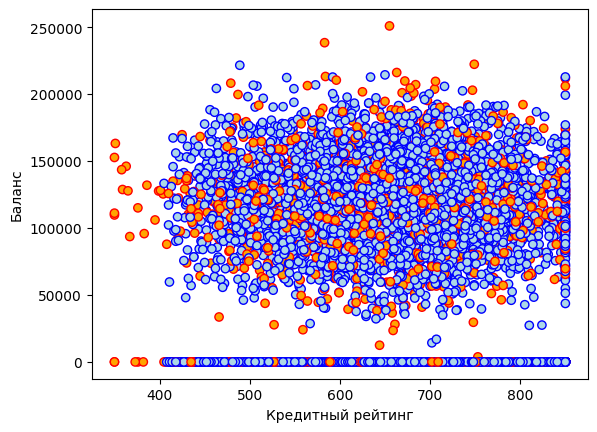

In [76]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['Exited'].map({0: 'lightblue', 1: 'orange'})
edge_c = data['Exited'].map({0: 'blue', 1: 'red'})

# Настройка графика
plt.scatter(data['CreditScore'], data['Balance'],
            color=c, edgecolors=edge_c)
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Баланс');
plt.show()

График на рисунке 25 можно построить различными способами, например, можно добавлять множества точек отдельными подмножествами, указывая параметры визуализации для каждого подмножества (рисунок 26).

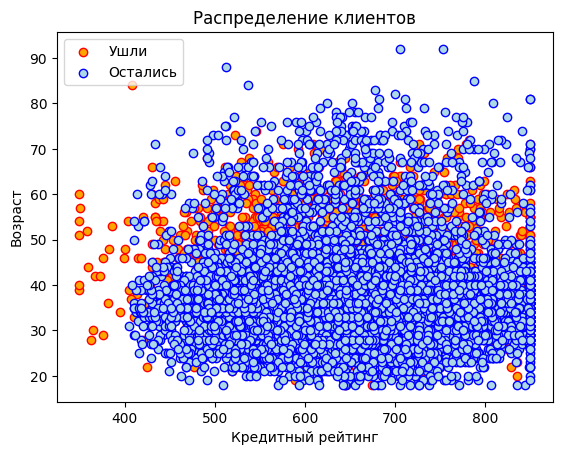

In [77]:
#Ушедшие клиенты
data_churn = data[data['Exited'] == 1]
# Оставшиеся клиенты
data_loyal = data[data['Exited'] == 0]

plt.scatter(data_churn['CreditScore'],
            data_churn['Age'],
            color='orange',
            edgecolors='red',
            label='Ушли'
            )

plt.scatter(data_loyal['CreditScore'],
            data_loyal['Age'],
            color='lightblue',
            edgecolors='blue',
            label='Остались'
            )

plt.xlabel('Кредитный рейтинг')
plt.ylabel('Возраст')
plt.title('Распределение клиентов')
plt.legend();
plt.show()


В реальных задачах машинного обучения при первичном анализе данных необходимо выявить корреляции признаков обучающей выборки. В пакете Pandas имеется встроенный инструмент для этого – метод corr() класса DataFrame. На рисунке 27 показан фрагмент вывода этой функции.

In [86]:
# data.corr()
# этот код выдает ошиьку, потому что функция corr пытается посчитать все числовые столбцы в датасете
# а в датасете есть текстовые столбцы, поэтому он и выдает ошибку

# тут выбираем только числовые столбцы
data_numeric = data.select_dtypes(include=[np.number])

# вычисляем эти самые столбцы
corr_matrix = data_numeric.corr()

Полученная матрица имеет размер 17 × 17. Это незначительный размер (в реальных задачах машинного обучения размеры матриц корреляции имеют порядки 106 − 1010 и более), но даже для матрицы рассматриваемого набора данных проанализировать корреляцию признаков вручную – трудоемкая задача. Например, можно использовать скрипты, для выделения больших коэффициентов корреляции. Но лучше использовать специальный тип графика – heatmap (рисунок 28).

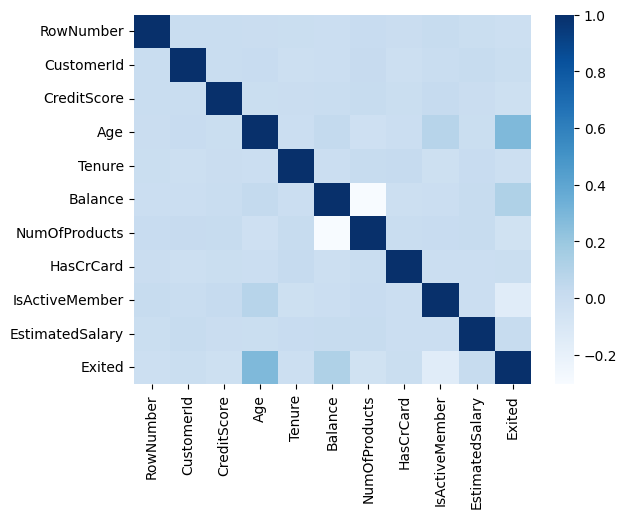

In [87]:
# sns.heatmap(data.corr(), cmap=plt.cm.Blues);
# тут по той же причине что и выше - выдает ошибку

data_numeric = data.select_dtypes(include=[np.number])
sns.heatmap(data_numeric.corr(), cmap=plt.cm.Blues);


Коррелирующие признаки обычно удаляются и не рассматриваются в процессе обучения.

Важные замечания
1.	Статья о типах графиков при первичном анализе данных:
https://medium.com/open-machine-learning-course/open-machine-learning-coursetopic-2-visual-data-analysis-in-python-846b989675cd
2.	В качестве среды разработки используйте языки программирования Python, Java или C#. По согласованию с преподавателем студент может самостоятельно может выбрать язык программирования и среду разработки (при этом студенту необходимо критически обосновать свой выбор).
2.	При выборе набора данных (data set) на ресурсах [3, 4] необходимо согласовать свой выбор с другими студентами группы и преподавателем, так как работа над одинаковыми наборами данных недопустима.
3.	В рамках данного лабораторного курса рекомендуется использовать инструментарий Python (библиотеки, среду разработки) для решения поставленных задач.

Индивидуальное задание
1.	Подберите набор данных на ресурсах [3, 4] и согласуйте свой выбор с преподавателем. Студент может предложить набор данных в соответствии с тематикой магистерского исследования.
2.	Проведите первичный анализ данных. Особое внимание следует уделить графическому представлению распрееделений признаков, визуализации взаимосвзей, позволяющие судить о наборе данных. Построение графиков желательно произвести по нескольким проекциям. При анализе данных использовать как можно более разнообразные типы графиков.

Содержание отчета и его форма

Отчет по лабораторной работе должен содержать:
1.	Номер и название лабораторной работы; задачи лабораторной работы.
2.	Реализация каждого пункта подраздела «Индивидуальное задание» с приведением исходного кода программы, диаграмм и графиков для визуализации данных.
3.	Ответы на контрольные вопросы.
4.	Экранные формы (консольный вывод) и листинг программного кода с комментариями, показывающие порядок выполнения лабораторной работы, и результаты, полученные в ходе её выполнения.
Отчет о выполнении лабораторной работы сдается преподавателю.

Контрольные вопросы

1.	Какие инструментальные средства используются для организации рабочего места специалиста Data Science?
2.	Какие библиотеки Python используются для работы в области машинного обучения? Дайте краткую характеристику каждой библиотеке.
3.	Почему при реализации систем машинного обучения широкое распространение получили библиотеки Python?

Список литературы

Для выполнения лабораторной работы, при подготовке к защите, а также для ответа на контрольные вопросы рекомендуется использовать следующие источники: [1-4].
